# Software Project Conflict Classifier

To include necessary libraries in our code, we import pandas, a tool for data analysis and manipulation, numpy, a Python package for numerical computing, and scikit-learn, a Python machine learning package. It's important to note that scikit-learn is imported using the identifier "sklearn."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# to make this notebook's output stable across runs
np.random.seed(42)

Next, we need to retrieve the data from a file, such as a CSV file, and store it in our program's memory. To accomplish this, we can utilize the read_csv function provided by pandas. Please ensure that the path to the data file is correct.

In [2]:
input_file = "./MergeConflictsDataset.csv"
data = pd.read_csv(input_file, header = 0, delimiter=';')

# Data Overview

Now, let's examine the data we have obtained.

In [3]:
data

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,c52216c411e4d7d9ef7845926f471f49f48b3ea5,5d50b1ca2496766e6d3f3673e1f6abff20f9ffaf,d7727481e759ef6ac2c285d64c4ebb86666652f9,5d50b1ca2496766e6d3f3673e1f6abff20f9ffaf,1,66,0,0,1,184,...,0,0,0,0,0,19,19,19.00000,19.0,0
26969,8bf4fb99b439379ed99f0a4fc761fa65ca31d8ba,a248acc589a43d7234d383252546b99b27ec32b9,478863dfe34904b9490be64c0d508e0af6b46b2f,ebffde52d50a6c8f9973ec675b8ab17dea5420e1,1,1,1,2,1,762,...,0,0,0,0,0,30,34,33.20000,34.0,0
26970,a27a50f87f61d871ddb1aeed6993b132fd657ea6,542ff7fe4297d73a39664b468962ab681e4bea91,ddddae9b5f9537cb06d2c4872184fa25d9f3ca77,542ff7fe4297d73a39664b468962ab681e4bea91,1,1,1,0,1,22,...,0,0,0,0,0,8,58,33.00000,33.0,0
26971,ddddae9b5f9537cb06d2c4872184fa25d9f3ca77,542ff7fe4297d73a39664b468962ab681e4bea91,e6ed8366b6e1e72bc8de97159198c64edab5cd96,542ff7fe4297d73a39664b468962ab681e4bea91,1,1,1,0,1,11,...,0,0,0,0,0,8,8,8.00000,8.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26973 entries, 0 to 26972
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26973 non-null  object 
 1   parent1          26973 non-null  object 
 2   parent2          26973 non-null  object 
 3   ancestor         26972 non-null  object 
 4   is pr            26973 non-null  int64  
 5   added lines      26973 non-null  int64  
 6   deleted lines    26973 non-null  int64  
 7   devs parent1     26973 non-null  int64  
 8   devs parent2     26973 non-null  int64  
 9   time             26973 non-null  int64  
 10  nr files         26973 non-null  int64  
 11  added files      26973 non-null  int64  
 12  deleted files    26973 non-null  int64  
 13  renamed files    26973 non-null  int64  
 14  copied files     26973 non-null  int64  
 15  modified files   26973 non-null  int64  
 16  nr commits1      26973 non-null  int64  
 17  nr commits2 

In [5]:
data.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26973.000000,2.697300e+04,2.697300e+04,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,...,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000
mean,0.777741,4.255746e+02,2.504278e+02,4.656175,1.911801,240.714159,0.752048,2.431061,1.396545,0.970229,...,4.316205,0.955437,1.338857,0.096281,1.007860,51.391280,104.662551,69.455646,68.021095,0.054425
std,0.415772,8.887706e+03,1.027916e+04,12.230444,6.534316,908.382038,10.620490,67.840678,90.614277,64.245155,...,12.924317,3.203307,4.269666,0.541916,6.033535,34.560112,89.471017,40.057823,39.385369,0.226858
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.391304,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.714286,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


# Feature Encoding

Presently, our objective is to allocate numerical codes to the available data. One approach is to assign unique numbers to every possible value within a column. This task can be accomplished using the LabelEncoder functionality. Let's apply this process to each column within our dataset.

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_l = data.apply(le.fit_transform)

In [7]:
data_l

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,25206,25994,9899,18212,1,5,0,0,1,23,...,0,0,0,0,0,20,64,451,33,0
1,4283,11968,26283,11668,0,970,1111,1,2,371,...,0,0,0,0,0,31,116,1732,100,1
2,24358,5698,19606,3951,1,0,0,0,1,22,...,0,0,0,0,0,18,17,71,29,0
3,1270,6896,14036,18400,1,0,0,2,1,24,...,0,0,0,0,0,22,62,582,55,0
4,7008,12515,9845,2600,0,0,0,1,2,2,...,0,0,0,0,0,31,55,770,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,20769,9780,22531,6834,1,66,0,0,1,184,...,0,0,0,0,0,19,18,77,31,0
26969,14869,16788,7494,17026,1,1,1,2,1,736,...,0,0,0,0,0,30,33,384,61,0
26970,17164,8839,23185,6131,1,1,1,0,1,22,...,0,0,0,0,0,8,57,378,59,0
26971,23388,8839,24104,6131,1,1,1,0,1,11,...,0,0,0,0,0,8,7,13,9,0


As usual, we start by extracting the attribute values from the dataset. Using these attribute values, we will make predictions for the target variable, which represents the label we aim to predict.

In [8]:
X = data_l[data.columns.drop('conflict')]

In [9]:
y = data_l['conflict']

   # Feature Selection

Now, we can proceed to visualize the encoded data in order to identify any potential patterns or trends.

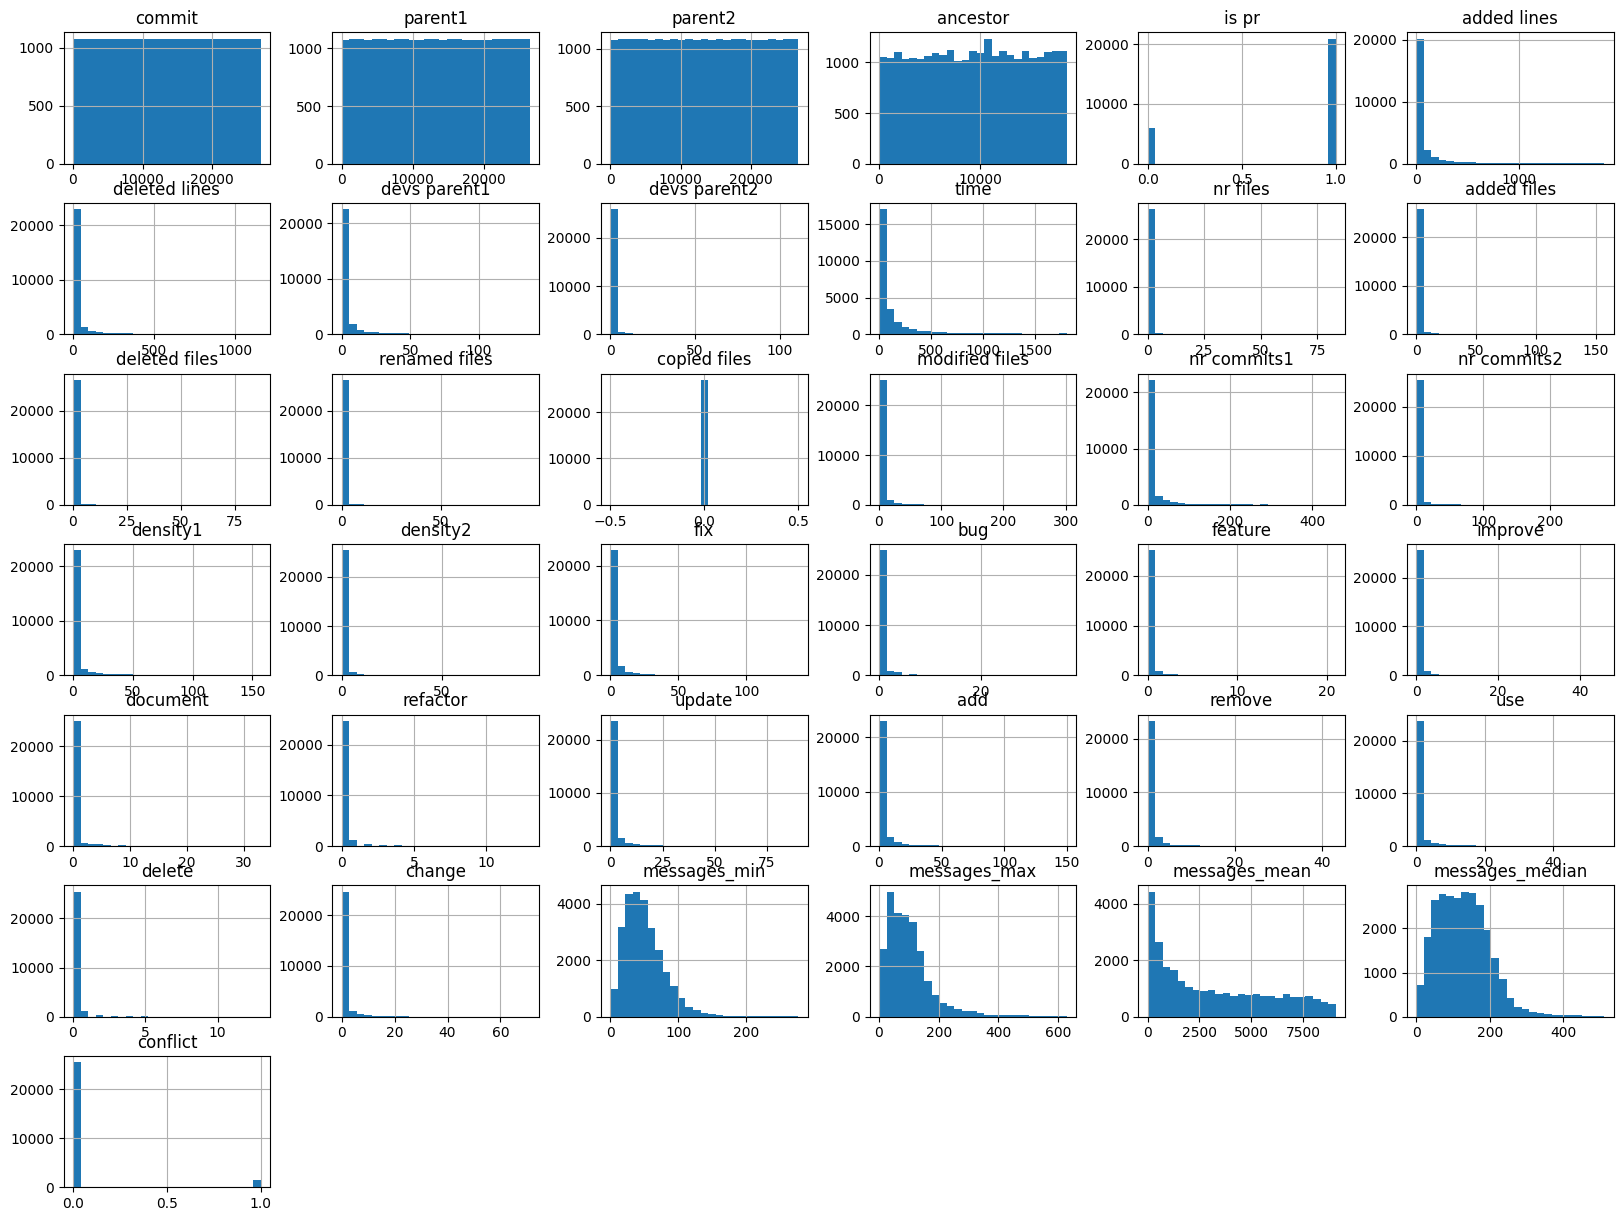

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
data_l.hist(bins=25, figsize=(20,15))
plt.show()

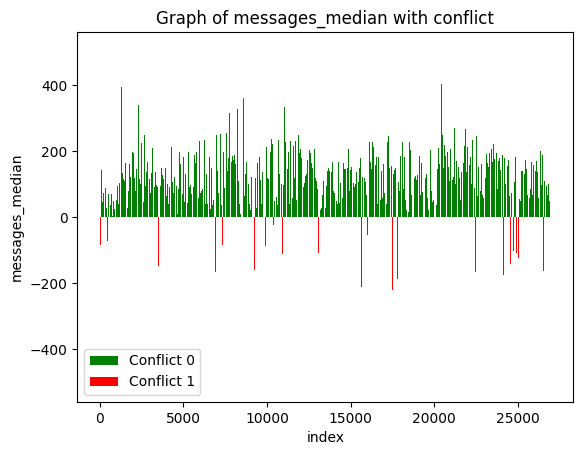

In [11]:
# Split the DataFrame based on the conflict value
conflict_0 = data_l[data_l["conflict"] == 0]
conflict_1 = data_l[data_l["conflict"] == 1]

# Get the index values for each group
index_0 = conflict_0.index
index_1 = conflict_1.index

# Get the messages_median values for each group
messages_median_0 = conflict_0["messages_median"]
messages_median_1 = conflict_1["messages_median"]

# Plot the positive bars for conflict 0
plt.bar(index_0, messages_median_0, color="green", label="Conflict 0",width = 0.8)

# Plot the negative bars for conflict 1
plt.bar(index_1, -messages_median_1, color="red", label="Conflict 1",width = 0.8)

# Set the x-axis label and title
plt.xlabel("index")
plt.ylabel("messages_median")
plt.title("Graph of messages_median with conflict")

# Add a legend
plt.legend()

# Show the graph
plt.show()

Next, let's explore the correlation among these features to understand the relationships between them.

In [12]:
corr_matrix = data_l.corr()
corr_matrix["conflict"].sort_values(ascending=False)

conflict           1.000000
nr files           0.374871
nr commits2        0.323226
devs parent2       0.291239
density2           0.240326
add                0.236471
added lines        0.219207
remove             0.202627
deleted lines      0.199905
modified files     0.180460
fix                0.166107
update             0.162551
time               0.159510
messages_max       0.153230
refactor           0.144610
change             0.136917
use                0.129099
feature            0.126438
added files        0.123738
nr commits1        0.122167
bug                0.116926
document           0.097339
improve            0.090905
deleted files      0.089133
renamed files      0.074928
devs parent1       0.074380
delete             0.062698
messages_mean      0.027133
density1           0.023695
messages_median    0.020418
ancestor           0.008121
parent2            0.006722
parent1            0.002040
commit             0.001194
messages_min      -0.091792
is pr             -0

Now, we will remove some insignificant features from the dataset.

In [13]:
data.columns.drop('commit')
data.columns.drop('parent1')
data.columns.drop('parent2')
data.columns.drop('ancestor')

Index(['commit', 'parent1', 'parent2', 'is pr', 'added lines', 'deleted lines',
       'devs parent1', 'devs parent2', 'time', 'nr files', 'added files',
       'deleted files', 'renamed files', 'copied files', 'modified files',
       'nr commits1', 'nr commits2', 'density1', 'density2', 'fix', 'bug',
       'feature', 'improve', 'document', 'refactor', 'update', 'add', 'remove',
       'use', 'delete', 'change', 'messages_min', 'messages_max',
       'messages_mean', 'messages_median', 'conflict'],
      dtype='object')

# Dataset Split, Imputation and Normalization

We will now divide the dataset into training and testing data.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

To handle the 0 values in the dataset and prevent data leakage, we will impute these values with the mean value of the respective feature.

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

To ensure data integrity and prevent data leakage, we will normalize the dataset. Normalization is a process that scales the features to a standardized range, such as between 0 and 1, without altering their relative relationships.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree Classifier

Now, we can proceed to construct and train the model. Before training, we will begin by tuning the hyperparameters, which are the settings that control the behavior of the model.

In [17]:
dt_gs = DecisionTreeClassifier(random_state=42)
parameter_space = {
    'criterion': ['entropy'],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(dt_gs, parameter_space, n_jobs=-1, cv=5, scoring='f1')
clf.out_activation='logistic'
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}


Now, we will proceed with constructing and training the model.

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2, min_samples_split=10)
clf.fit(X_train,y_train) # fit model to train data, i.e., build the tree

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=10)

Now, let's analyze and explore various metrics to evaluate the performance of our model.

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = clf.predict(X_test) # generate predictions for the test dataset

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_pred))

Confusion Matrix: 
 [[5018   72]
 [ 123  182]]
Accuracy:  0.963855421686747
Precision:  0.7165354330708661
Recall:  0.5967213114754099
F1:  0.6511627906976744
ROC AUC:  0.7912879641856422


# Random Forest Classifier

Now, we can proceed to construct and train the model. Before training, we will begin by tuning the hyperparameters, which are the settings that control the behavior of the model.

In [21]:
rf_gs = RandomForestClassifier(random_state=42)
parameter_space = {
    'n_estimators': [80, 100, 120],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(rf_gs, parameter_space, n_jobs=-1, cv=5, scoring='f1')
clf.out_activation='logistic'
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 120}


Now, we will proceed with constructing and training the model.

In [22]:
clf = RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=120, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=120,
                       random_state=42)

Let's examine the model that we have just constructed.

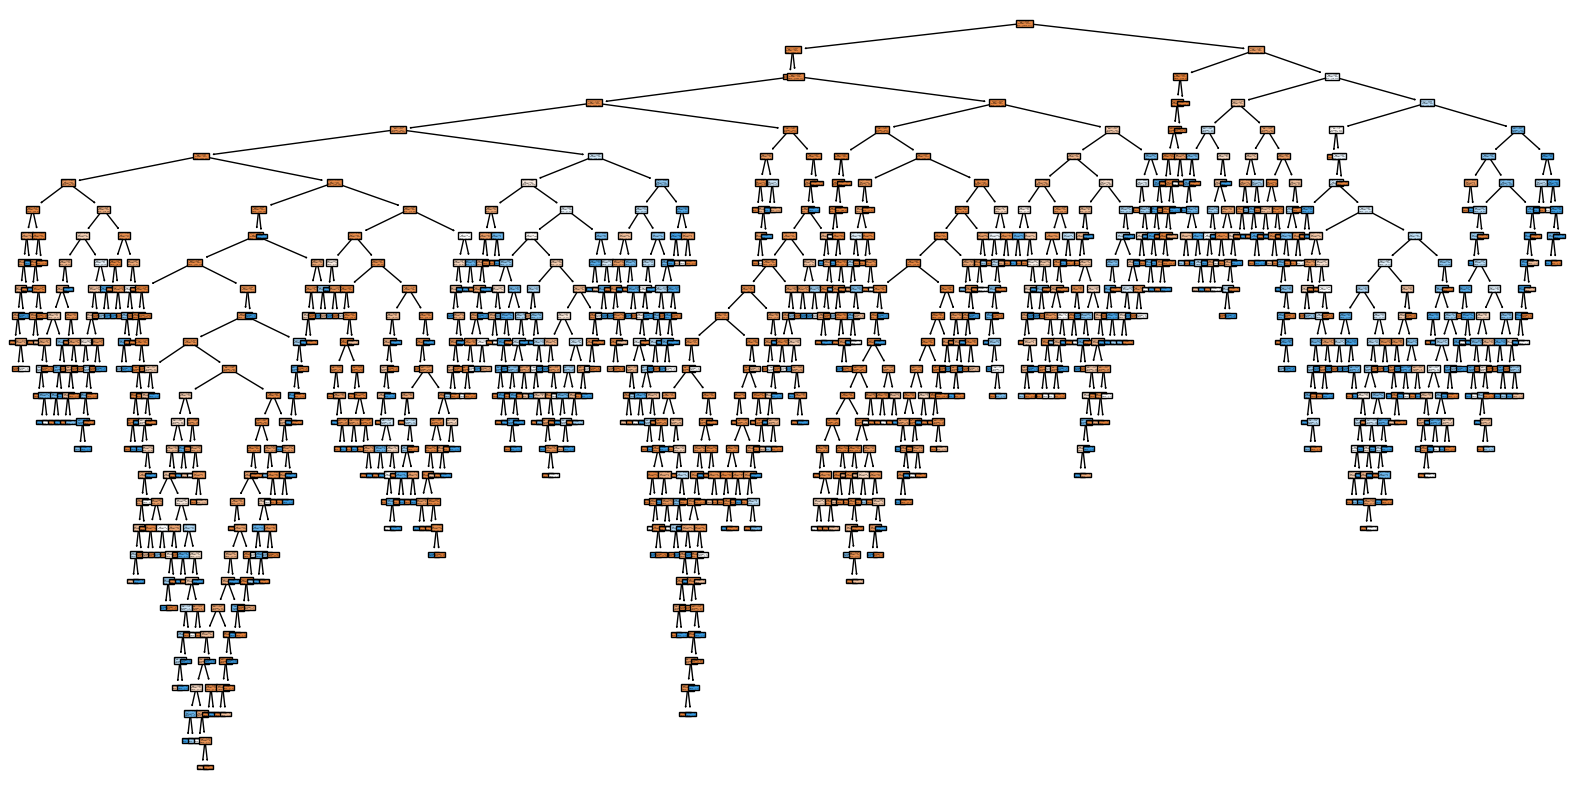

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)
plt.show()

Now, let's analyze and explore various metrics to evaluate the performance of our model.

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = clf.predict(X_test) # generate predictions for the test dataset

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_pred))

Confusion Matrix: 
 [[5038   52]
 [ 118  187]]
Accuracy:  0.9684893419833179
Precision:  0.7824267782426778
Recall:  0.6131147540983607
F1:  0.6875
ROC AUC:  0.801449322039357


# Multilayer Perceptron Classifier

Now, we can proceed to construct and train the model. Before training, we will begin by tuning the hyperparameters, which are the settings that control the behavior of the model.

In [25]:
mlp_gs = MLPClassifier(max_iter=500)
parameter_space = {
    'activation': ['tanh', 'relu'],
    'alpha': [0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 0.08, 0.1],
    'hidden_layer_sizes': [(20, 15, 10, 5), (20, 20, 10, 10, 5), (10, 8, 6, 4, 2),
                           (5, 5, 5, 5), (7, 6, 5, 4, 3)],
    'learning_rate': ['adaptive'],
    'learning_rate_init' : [0.001, 0.005, 0.01, 0.02, 0.05],
    'solver': ['adam'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5, scoring='f1')
clf.out_activation='logistic'
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.03, 'hidden_layer_sizes': (7, 6, 5, 4, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}


Now, we will proceed with constructing and training the model.

In [26]:
clf = MLPClassifier(random_state=42,
                    activation='relu',
                    alpha=0.07,
                    hidden_layer_sizes=(10, 8, 6, 8, 10, 4, 2, 4),
                    learning_rate='adaptive',
                    learning_rate_init=0.001,
                    solver='adam',
                    max_iter=500)
clf.fit(X_train, y_train)

MLPClassifier(alpha=0.07, hidden_layer_sizes=(10, 8, 6, 8, 10, 4, 2, 4),
              learning_rate='adaptive', max_iter=500, random_state=42)

Now, let's analyze and explore various metrics to evaluate the performance of our model.

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = clf.predict(X_test) # generate predictions for the test dataset

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_pred))

Confusion Matrix: 
 [[4981  109]
 [  75  230]]
Accuracy:  0.9658943466172382
Precision:  0.6784660766961652
Recall:  0.7540983606557377
F1:  0.7142857142857143
ROC AUC:  0.8663419111726626


# Conclusion

A picture speaks volumes.

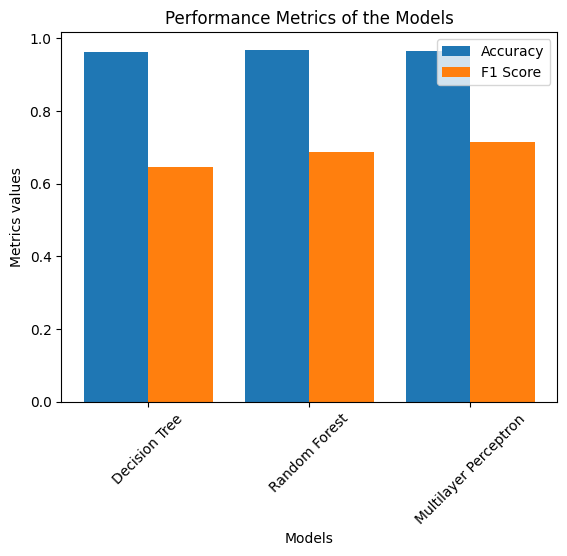

In [28]:
metrics = [[0.9632993512511585, 0.6451612903225806],
           [0.9684893419833179, 0.6875],
           [0.9658943466172382, 0.7142857142857143]]

models = ['Decision Tree', 'Random Forest', 'Multilayer Perceptron']

# Extracting the individual metrics
accuracy_values = [row[0] for row in metrics]
f1_values = [row[1] for row in metrics]

# Creating the x positions for the bars
x = np.arange(len(models))

# Width of the bars
width = 0.4

# Creating the bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_values, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_values, width, label='F1 Score')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Metrics values')
ax.set_title('Performance Metrics of the Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)  # Rotate the labels for better visibility

# Adding legend
ax.legend()

# Displaying the chart
plt.show()